In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find('table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
rate_table

[<tr>
 <td class="currency phone-small-font" data-table="幣別">
 <div>
 <div class="sp-div sp-america-div">
 <img alt="美金" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
 </div>
 <br class="visible-phone print_hide"/>
 <div class="visible-phone print_hide">
                                 美金 (USD)
                             </div>
 <div class="hidden-phone print_show xrt-cur-indent">
                                 美金 (USD)
                             </div>
 </div>
 </td>
 <td class="rate-content-cash text-right print_hide" data-table="本行現金買入">32.7</td>
 <td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">33.37</td>
 <td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">
                         33.025
                     </td>
 <td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">
                         33.175
                     </td>
 <td clas

In [7]:
rate_table[0]

<tr>
<td class="currency phone-small-font" data-table="幣別">
<div>
<div class="sp-div sp-america-div">
<img alt="美金" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
</div>
<br class="visible-phone print_hide"/>
<div class="visible-phone print_hide">
                                美金 (USD)
                            </div>
<div class="hidden-phone print_show xrt-cur-indent">
                                美金 (USD)
                            </div>
</div>
</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金買入">32.7</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">33.37</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">
                        33.025
                    </td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">
                        33.175
                    </td>
<td class="text-center print_hid

In [20]:
# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find('div','visible-phone print_hide')
print(currency.text.replace(" ",""))

buy_rate = rate_table[0].find('td', attrs={'data-table':"本行現金買入"})
sell_rate = rate_table[0].find('td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.text, sell_rate.text))


美金(USD)

即時現金買入: 32.7, 即時現金賣出: 33.37


In [21]:
#試著爬取所有貨幣對台幣的匯率
for table in rate_table:
    currency = table.find('div','visible-phone print_hide')
    print(currency.text.replace(" ",""))

    buy_rate = table.find('td', attrs={'data-table':"本行現金買入"})
    sell_rate = table.find('td', attrs={'data-table':'本行現金賣出'})
    print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.text, sell_rate.text))




美金(USD)

即時現金買入: 32.7, 即時現金賣出: 33.37

港幣(HKD)

即時現金買入: 4.1, 即時現金賣出: 4.304

英鎊(GBP)

即時現金買入: 41.65, 即時現金賣出: 43.77

澳幣(AUD)

即時現金買入: 20.43, 即時現金賣出: 21.21

加拿大幣(CAD)

即時現金買入: 22.63, 即時現金賣出: 23.54

新加坡幣(SGD)

即時現金買入: 24.08, 即時現金賣出: 24.99

瑞士法郎(CHF)

即時現金買入: 36.79, 即時現金賣出: 37.99

日圓(JPY)

即時現金買入: 0.2118, 即時現金賣出: 0.2246

南非幣(ZAR)

即時現金買入: -, 即時現金賣出: -

瑞典幣(SEK)

即時現金買入: -, 即時現金賣出: -

紐元(NZD)

即時現金買入: 18.44, 即時現金賣出: 19.29

泰幣(THB)

即時現金買入: 0.8467, 即時現金賣出: 1.0367

菲國比索(PHP)

即時現金買入: 0.5111, 即時現金賣出: 0.6431

印尼幣(IDR)

即時現金買入: 0.00158, 即時現金賣出: 0.00228

歐元(EUR)

即時現金買入: 35.04, 即時現金賣出: 36.38

韓元(KRW)

即時現金買入: 0.02078, 即時現金賣出: 0.02468

越南盾(VND)

即時現金買入: 0.00105, 即時現金賣出: 0.00146

馬來幣(MYR)

即時現金買入: 6.434, 即時現金賣出: 7.959

人民幣(CNY)

即時現金買入: 4.458, 即時現金賣出: 4.62


In [29]:
#爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find('table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find('td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁


美金(USD)



In [30]:
history_rate_link

'https://rate.bot.com.tw/xrt/history/USD?Lang=zh-TW'

In [38]:
history_link.a

<a href="/xrt/history/USD?Lang=zh-TW" target="_blank" title="美金 歷史匯率 (另開視窗)">查詢</a>

In [26]:
history_link.a["href"]

'/xrt/history/USD?Lang=zh-TW'

In [31]:
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2025-03")
quote_history_url

'https://rate.bot.com.tw/xrt/quote/2025-03/USD?Lang=zh-TW'

In [35]:
# === 1. 發送請求並獲取 HTML ===
resp = requests.get(quote_history_url) # 發送 GET 請求獲取網頁內容
resp.encoding = 'utf-8'

# === 2. 解析 HTML ===
history = BeautifulSoup(resp.text, "lxml") # 解析 HTML 內容
history

<!DOCTYPE html>
<html class="no-js" lang="zh-TW">
<head>
<meta charset="utf-8"/>
<title>歷史本行營業時間牌告匯率</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="臺灣銀行匯率利率黃金牌價查詢" name="description"/>
<meta content="" name="keywords"/>
<meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png" property="og:image"/>
<meta content="index,follow" name="robots"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="/Content/css/font-awesome.min.css" rel="stylesheet"/>
<link href="/Content/css/jquery-ui.min.css" rel="stylesheet"/>
<link href="/Content/main-3.8.0.css" rel="stylesheet"/>
<style nonce="BswaqW+Kba7MkH19CrlDzInPAxIPELbngGjLdXraRuU=">
    
    
    
    .bank {display:none}
    </style>
<noscript>
<style>
            table th.noscript {
                display: table-cell;
            }



In [37]:
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
history_table

[<tr>
 <td class="text-center"><a href="/xrt/quote/2025-03-28/USD/spot">2025/03/28</a></td>
 <td class="text-center tablet_hide">美金 (USD)</td>
 <td class="rate-content-cash text-right print_table-cell">32.7</td>
 <td class="rate-content-cash text-right print_table-cell">33.37</td>
 <td class="rate-content-sight text-right print_table-cell">33.05</td>
 <td class="rate-content-sight text-right print_table-cell">33.15</td>
 </tr>,
 <tr>
 <td class="text-center"><a href="/xrt/quote/2025-03-27/USD/spot">2025/03/27</a></td>
 <td class="text-center tablet_hide">美金 (USD)</td>
 <td class="rate-content-cash text-right print_table-cell">32.71</td>
 <td class="rate-content-cash text-right print_table-cell">33.38</td>
 <td class="rate-content-sight text-right print_table-cell">33.06</td>
 <td class="rate-content-sight text-right print_table-cell">33.16</td>
 </tr>,
 <tr>
 <td class="text-center"><a href="/xrt/quote/2025-03-26/USD/spot">2025/03/26</a></td>
 <td class="text-center tablet_hide">美金 (US

<Figure size 1000x800 with 0 Axes>

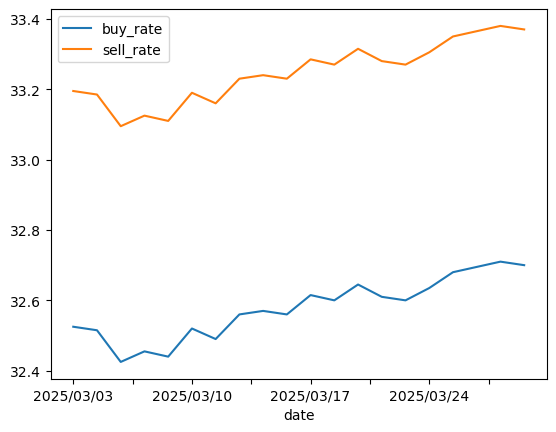

In [43]:
# 📌 建立空列表來存放歷史匯率資料
date_history = list()  # 存放歷史日期
history_buy = list()   # 存放歷史買入匯率
history_sell = list()  # 存放歷史賣出匯率

# 📌 迴圈遍歷每一列歷史匯率資料
for history_rate in history_table:
    # 🔹 擷取日期資料
    date_string = history_rate.a.text  # 取得日期字串（格式應該是 'YYYY/MM/DD'）
    
    # 🔹 轉換日期格式
    date = datetime.strptime(date_string, '%Y/%m/%d').strftime('%Y/%m/%d')
    date_history.append(date)  # 存入日期列表

    # 🔹 擷取買入與賣出匯率
    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    
    # 轉換為 `float` 型別後存入對應的列表
    history_buy.append(float(history_ex_rate[0].text))   # 存入買入匯率
    history_sell.append(float(history_ex_rate[1].text))  # 存入賣出匯率

# 📌 將歷史匯率資料轉為 `pandas.DataFrame`
HistoryExchangeRate = pd.DataFrame({
    'date': date_history,   # 設定 "date" 欄位為日期
    'buy_rate': history_buy,   # 設定 "buy_rate" 欄位為買入匯率
    'sell_rate': history_sell  # 設定 "sell_rate" 欄位為賣出匯率
})

# 📌 設定 "date" 欄位為 DataFrame 的索引值
HistoryExchangeRate = HistoryExchangeRate.set_index('date')

# 📌 根據日期升序排序，確保繪圖時數據按時間排列
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 📌 開始繪製歷史匯率趨勢圖
plt.figure(figsize=(10, 8))  # 設定圖表大小

# 🔹 繪製買入與賣出匯率的趨勢圖
HistoryExchangeRate[['buy_rate', 'sell_rate']].plot()

# 🔹 設定圖例顯示在左上角
plt.legend(loc="upper left")

# 📌 顯示圖表
plt.show()


美金(USD)



<Figure size 1000x800 with 0 Axes>

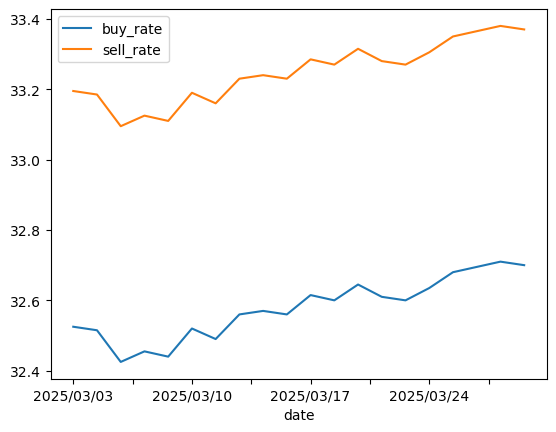


港幣(HKD)



<Figure size 1000x800 with 0 Axes>

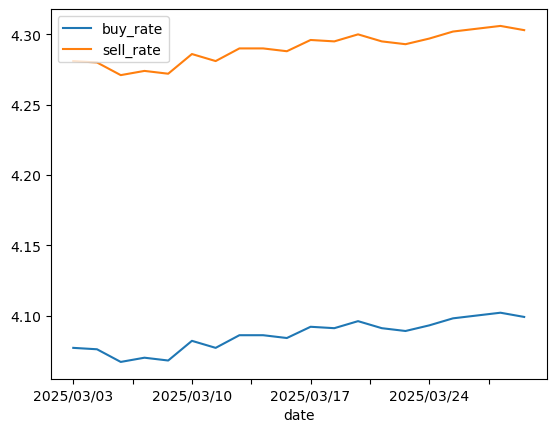


英鎊(GBP)



<Figure size 1000x800 with 0 Axes>

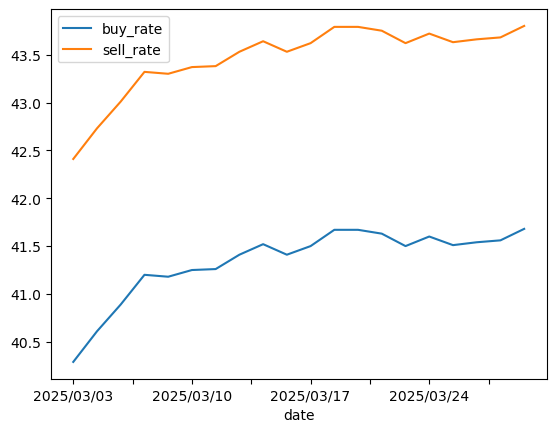


澳幣(AUD)



<Figure size 1000x800 with 0 Axes>

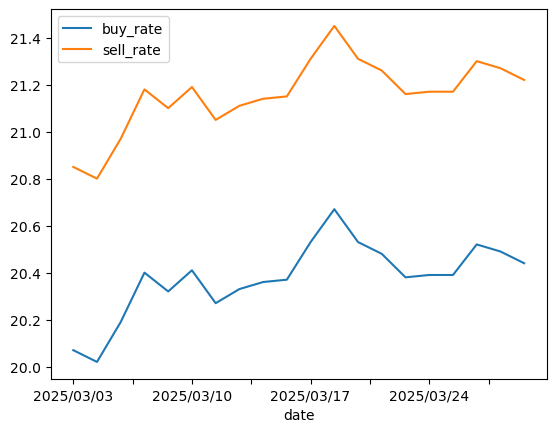


加拿大幣(CAD)



<Figure size 1000x800 with 0 Axes>

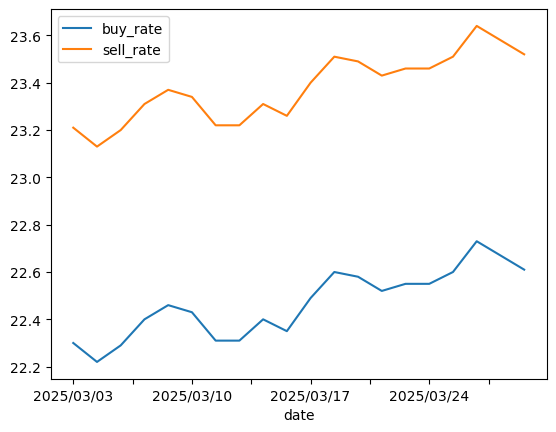


新加坡幣(SGD)



<Figure size 1000x800 with 0 Axes>

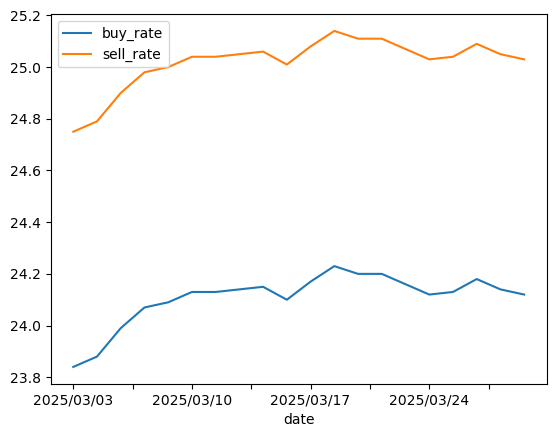


瑞士法郎(CHF)



<Figure size 1000x800 with 0 Axes>

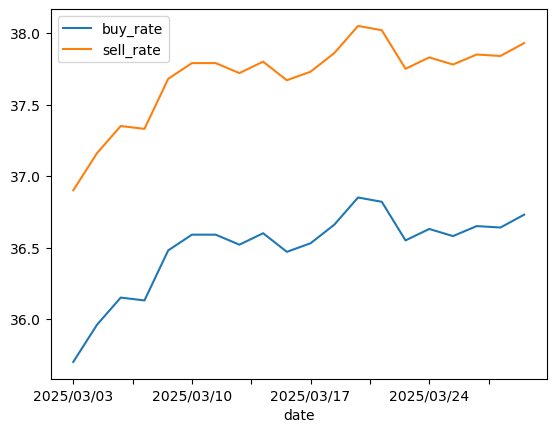


日圓(JPY)



<Figure size 1000x800 with 0 Axes>

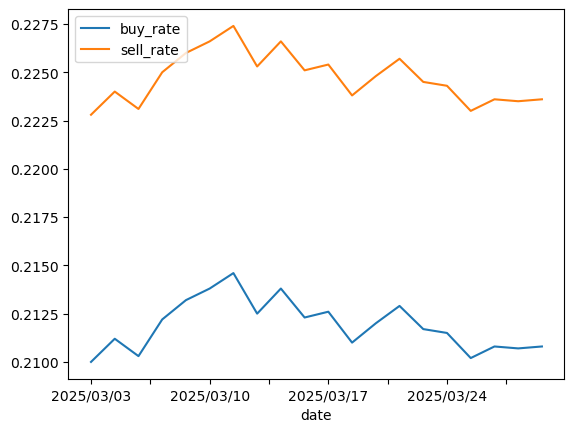


南非幣(ZAR)



<Figure size 1000x800 with 0 Axes>

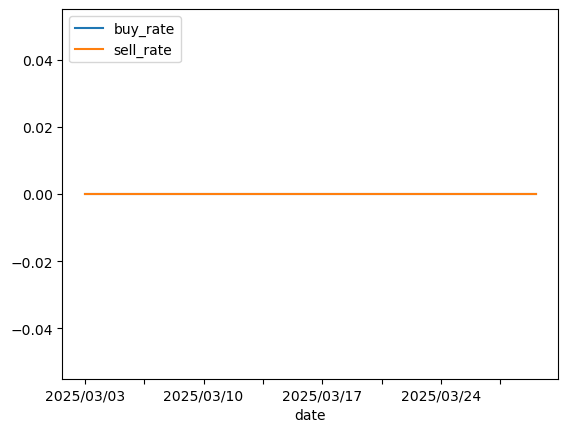


瑞典幣(SEK)



<Figure size 1000x800 with 0 Axes>

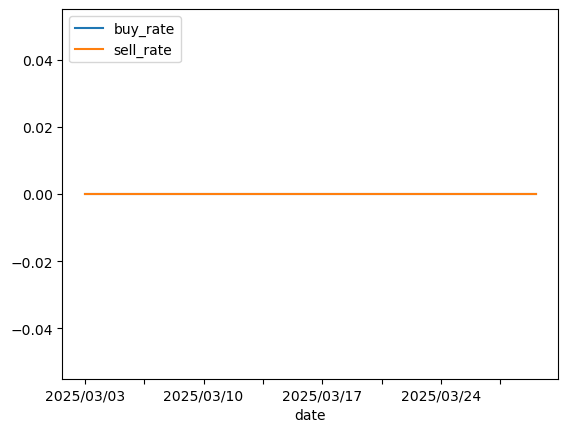


紐元(NZD)



<Figure size 1000x800 with 0 Axes>

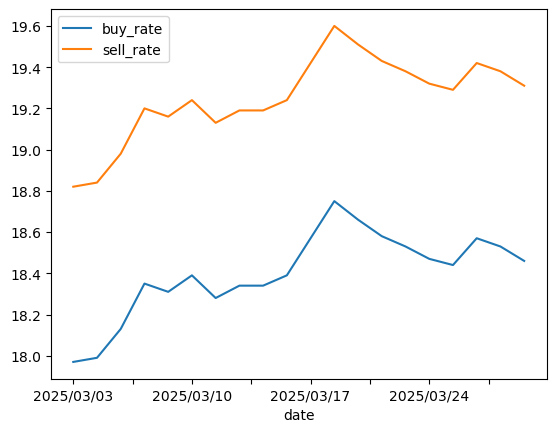


泰幣(THB)



<Figure size 1000x800 with 0 Axes>

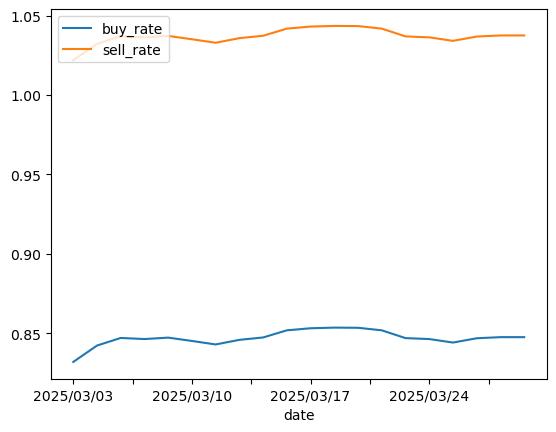


菲國比索(PHP)



<Figure size 1000x800 with 0 Axes>

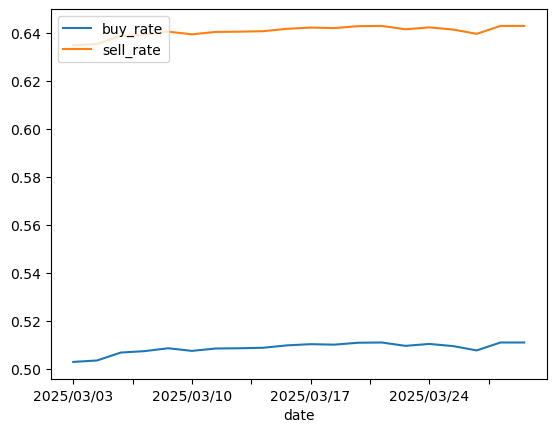


印尼幣(IDR)



<Figure size 1000x800 with 0 Axes>

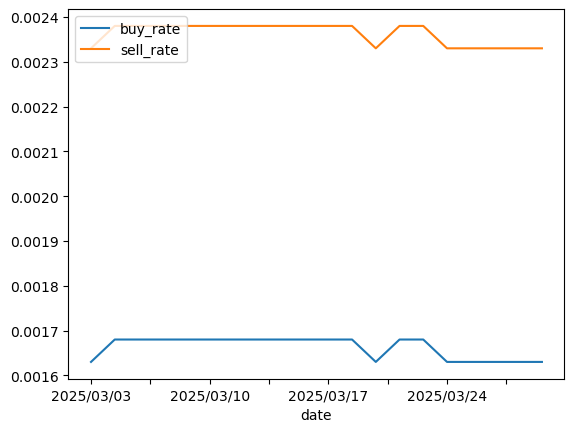


歐元(EUR)



<Figure size 1000x800 with 0 Axes>

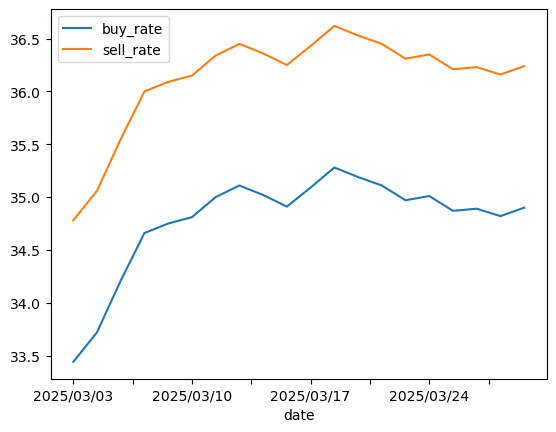


韓元(KRW)



<Figure size 1000x800 with 0 Axes>

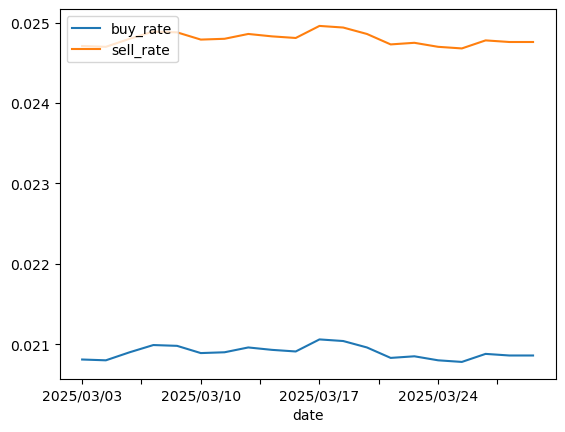


越南盾(VND)



<Figure size 1000x800 with 0 Axes>

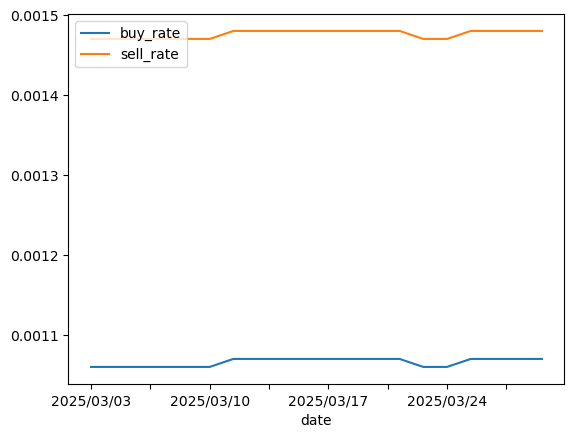


馬來幣(MYR)



<Figure size 1000x800 with 0 Axes>

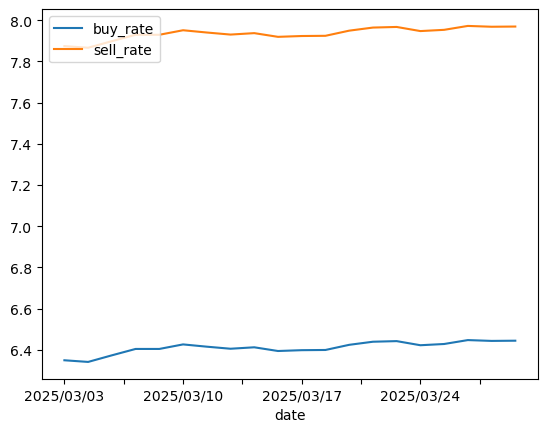


人民幣(CNY)



<Figure size 1000x800 with 0 Axes>

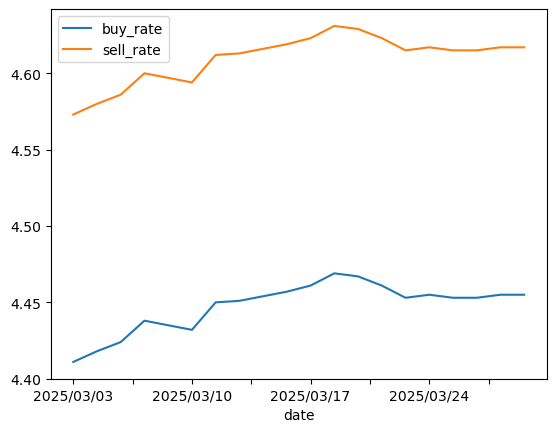

In [64]:
#爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find('table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for table in rate_table:
    currency = table.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 貨幣種類

    # 針對每種貨幣，找到其「歷史匯率」的首頁 
    history_link = table.find('td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

    quote_history_url = history_rate_link.replace("history", "quote/2025-03")

    # === 1. 發送請求並獲取 HTML ===
    resp = requests.get(quote_history_url) # 發送 GET 請求獲取網頁內容
    resp.encoding = 'utf-8'

    # === 2. 解析 HTML ===
    history = BeautifulSoup(resp.text, "lxml") # 解析 HTML 內容

    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
    
    # 📌 建立空列表來存放歷史匯率資料
    date_history = list()  # 存放歷史日期
    history_buy = list()   # 存放歷史買入匯率
    history_sell = list()  # 存放歷史賣出匯率

    # 📌 迴圈遍歷每一列歷史匯率資料
    for history_rate in history_table:
        # 🔹 擷取日期資料
        date_string = history_rate.a.get_text()  # 取得日期字串（格式應該是 'YYYY/MM/DD'）
    
        # 🔹 轉換日期格式（這裡格式寫錯了，%M 應該改成 %m，否則月份會錯誤）
        date = datetime.strptime(date_string, '%Y/%m/%d').strftime('%Y/%m/%d')
        date_history.append(date)  # 存入日期列表

        # 🔹 擷取買入與賣出匯率
        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    
        # 轉換為 `float` 型別後存入對應的列表
        history_buy.append(float(history_ex_rate[0].get_text()))   # 存入買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 存入賣出匯率

        # 📌 將歷史匯率資料轉為 `pandas.DataFrame`
    HistoryExchangeRate = pd.DataFrame({
          'date': date_history,   # 設定 "date" 欄位為日期
          'buy_rate': history_buy,   # 設定 "buy_rate" 欄位為買入匯率
          'sell_rate': history_sell  # 設定 "sell_rate" 欄位為賣出匯率
        })

       # 📌 設定 "date" 欄位為 DataFrame 的索引值
    HistoryExchangeRate = HistoryExchangeRate.set_index('date')

       # 📌 根據日期升序排序，確保繪圖時數據按時間排列
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

       # 📌 開始繪製歷史匯率趨勢圖
    plt.figure(figsize=(10, 8))  # 設定圖表大小

       # 🔹 繪製買入與賣出匯率的趨勢圖
    HistoryExchangeRate[['buy_rate', 'sell_rate']].plot()

       # 🔹 設定圖例顯示在左上角
    plt.legend(loc="upper left")

       # 📌 顯示圖表
    plt.show()